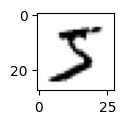

In [30]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_val, X_test = X_train/255., X_val/255., X_test/255.

plt.figure(figsize=(1,1))
plt.imshow(X_train[0].reshape(28, 28), cmap='Greys', )

In [60]:
import keras.backend as K

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'), 
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=3)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_sgd, metrics=['accuracy'])
# expo_lr = ExponentialLearningRate(1.005)


In [63]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 8/30
1719/1719 [============

KeyboardInterrupt: 

Text(0, 0.5, 'Loss')

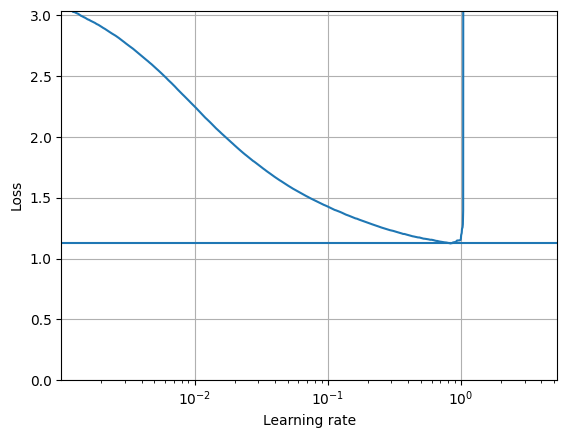

In [62]:
plt.plot(expo_lr.rates, expo_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expo_lr.losses), min(expo_lr.rates), max(expo_lr.rates))
plt.axis([min(expo_lr.rates), max(expo_lr.rates), 0, expo_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

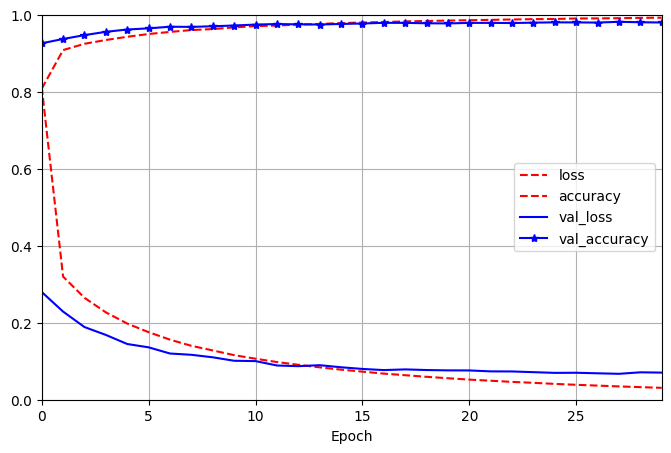

In [22]:


pd.DataFrame(history.history).plot(figsize=(8,5), xlim=[0, 29], ylim=[0,1], grid=True, xlabel='Epoch', style=['r--', 'r--', 'b-', 'b-*'])
plt.show()